# Assignment 1

## Question 3 (Linear Regression)

This assignment will have you working and experimenting with linear regression. The general multiple linear regression model, given $p$ predictors, is defined as: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon,$$ where $Y$ is the response variable, $X_j$ is the $j$<sup>th</sup> predictor and $\beta_j$ quantifies the association between the response and the variable. A good way to think about $\beta_j$ is as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. The $\epsilon$ term is the error term, which is independent of $X$ and has mean zero (the expected value of $Y$ when all variables are set to zero).

Work with Numpy only and do not use library functions that directly perform model fitting like `np.polyfit`. However, you may use library functions to compare your results while experimenting. This assignment becomes much easier to complete if accompanied by reading the third chapter in An Introduction to Statistical Learning. The text is freely available for download on the internet at [statlearning.com](statlearning.com)

Reference: James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. https://doi.org/10.1007/978-3-031-38747-0_3

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# other imports if necessary

### Part 1: Simple Regression

In this part, the function `gen_data()` samples hundred data points from a random 25 degree single-variable polynomial. This data is stored in the `predictor` and `response` variables. Your task is to experiment with linear regression on this dataset. Specifically:

1. Fit a line to the curve $(y=\beta_1x+\beta_0)$
2. Fit a polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$ and choose $k$ that satisfactorily minimizes error.
    - Note that the original polynomial is a 25 degree polynomial and we might not need exactly that many.
    - Check how well the coefficients match when we try to fit a 25 degree polynomial to the data. Get the coefficients from the `gen_data()` function.

Report error metrics for all experiments in tabular form (or any other way that helps us compare and choose between the different methods)



# **PART 1.1**

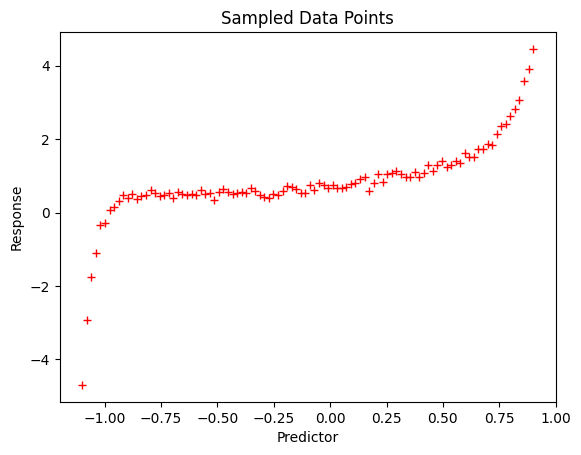

In [ ]:
def gen_data():
    coeff = np.random.rand(26)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y,coeff

predictor, response,gen_co = gen_data()

plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()


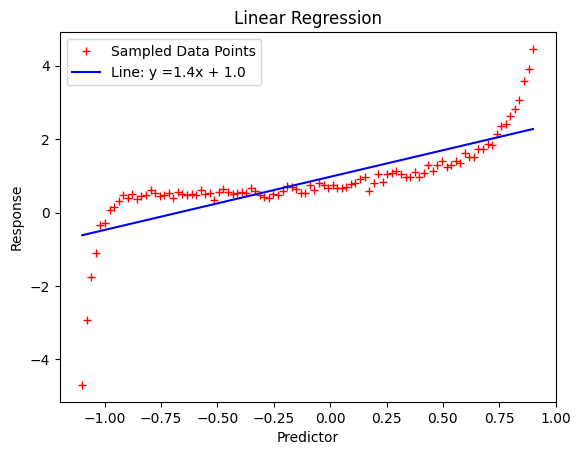

In [ ]:
###########SOLVED USING FORMULA FOR b0 and b1 IN STAT LEARNING#######################################
x_bar,y_bar = np.mean(predictor),np.mean(response)
weight = np.sum((predictor - x_bar) * (response - y_bar))/(np.sum((predictor - x_bar)**2))
intercept = y_bar - weight * x_bar
plt.plot(predictor, response, 'r+', label='Sampled Data Points')
plt.plot(predictor, weight * predictor + intercept, 'b-', label=f'Line: y ={weight:.1f}x + {intercept:.1f}')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Linear Regression')
plt.legend()
plt.show()

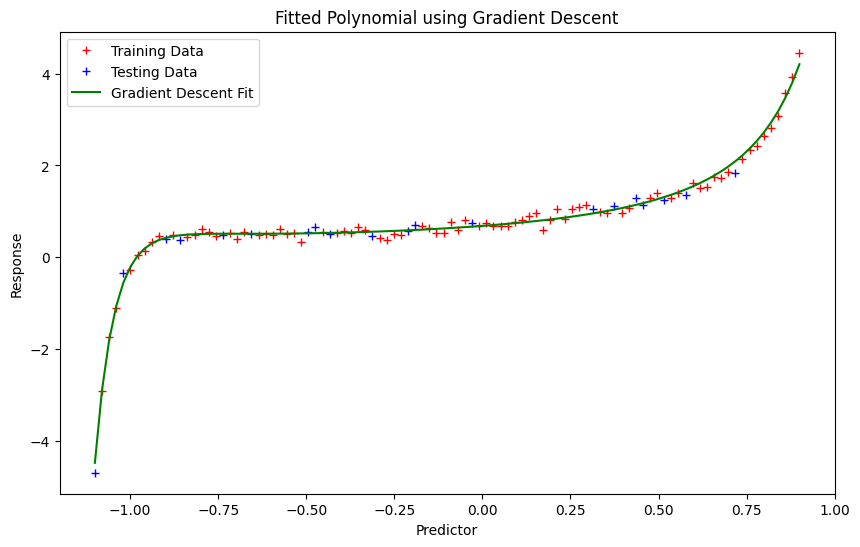

Gradient Descent MSE 0.013614631753522238


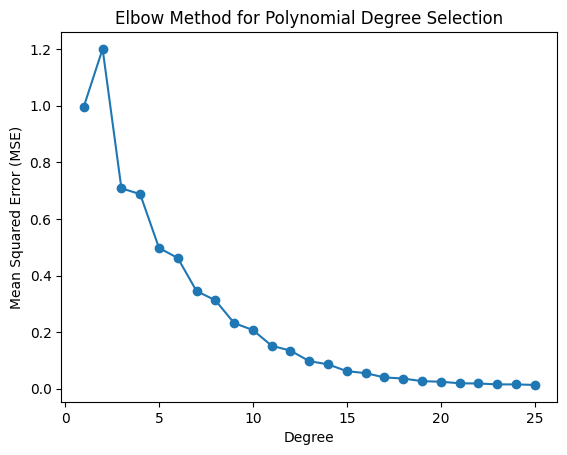

Best Degree 18


In [ ]:
###################splitting data into train-test-split#############################################################3
x_train_low, x_test_low, y_train_low, y_test_low = train_test_split(predictor, response, test_size=0.2, random_state=42)

######################### find best degree using elbow method & plot#####################################################################
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

class custom_gradient_descent:
    def __init__(self, degree, learning_rate=0.001, iterations=1000):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.coef = None

    def fit(self, x_train, y_train):
        self.coef = np.zeros(self.degree + 1)
       # print(self.coef.shape)
        for iter in range(self.iterations):
            powers_list = []
            for i in range(self.degree + 1):
                  power_array = x_train**(self.degree - i)
                  #print(power_array.shape)
                  powers_list.append(power_array)
                  #print(powers_list.shape)
            x_powers = np.column_stack(powers_list)
            #print(x_powers.shape)
            y_pred = np.dot(x_powers, self.coef)
            error = y_pred - y_train
            gradient = np.dot(x_powers.T, error)
            self.coef -= self.learning_rate * gradient

    def predict(self, x_test):
        x_powers = np.column_stack([x_test**(self.degree - i) for i in range(self.degree + 1)])
        return np.dot(x_powers, self.coef)


model_object = custom_gradient_descent(degree=25, learning_rate=0.001,iterations=1000)
model_object.fit(x_train_low, y_train_low)
y_pred_gradient_descent_low = model_object.predict(x_test_low)
mse_gradient_descent_low = mean_squared_error(y_test_low, y_pred_gradient_descent_low)
x_range_low = np.linspace(min(predictor), max(predictor), 100)
y_pred_gradient_descent_low_plot = model_object.predict(x_range_low)
plt.figure(figsize=(10, 6))
plt.plot(x_train_low, y_train_low, 'r+', label='Training Data')
plt.plot(x_test_low, y_test_low, 'b+', label='Testing Data')
plt.plot(x_range_low, y_pred_gradient_descent_low_plot, 'g-', label='Gradient Descent Fit')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Fitted Polynomial using Gradient Descent')
plt.legend()
plt.show()
print("Gradient Descent MSE", mse_gradient_descent_low)

def find_best_degree(x_train, y_train, x_test, y_test,mse_threshold=1e-2):
        degrees = np.arange(1, 26)
        mse_values = []

        for degree in degrees:
            model = custom_gradient_descent(degree=degree, learning_rate=0.001,iterations=1000)
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            mse = mean_squared_error(y_test, y_pred)
            mse_values.append(mse)

        # Plot the MSE values
        plt.plot(degrees, mse_values, marker='o')
        plt.xlabel('Degree')
        plt.ylabel('Mean Squared Error (MSE)')
        plt.title('Elbow Method for Polynomial Degree Selection')
        plt.show()
        best_degree = np.argmin(mse_values) + 1
        for i in range(1, len(mse_values) - 1):
            if abs(mse_values[i] - mse_values[i - 1]) < mse_threshold and abs(mse_values[i + 1] - mse_values[i]) < mse_threshold:
                  best_degree = i + 1
                  break
        return best_degree

best_degree_low = find_best_degree(x_train_low, y_train_low, x_test_low, y_test_low)
print("Best Degree", best_degree_low)


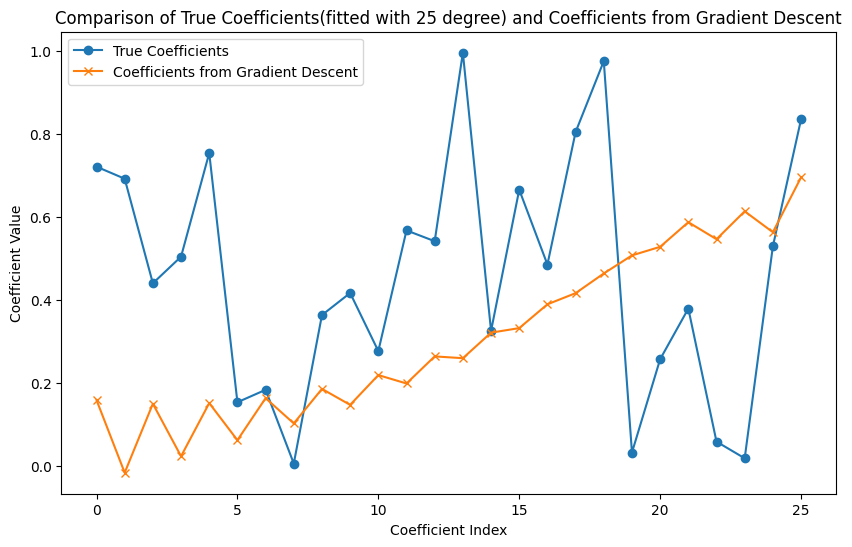

In [ ]:
model_object = custom_gradient_descent(degree=25, learning_rate=0.001, iterations=1000)
model_object.fit(predictor, response)
coefficients_from_gradient_descent = model_object.coef
plt.figure(figsize=(10, 6))
plt.plot(gen_co, label='True Coefficients', marker='o')
plt.plot(coefficients_from_gradient_descent, label='Coefficients from Gradient Descent', marker='x')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Comparison of True Coefficients(fitted with 25 degree) and Coefficients from Gradient Descent')
plt.legend()
plt.show()

#### Part 1.1 Regularization

In this section, you will be required to perform the converse of the previous section. After generating data from a lower degree polynomial, you will try to fit a higher degree polynomial to it. This will result in overfitting. You will then use regularization to reduce the overfitting. Try both L1 and L2 regularization and compare the results.

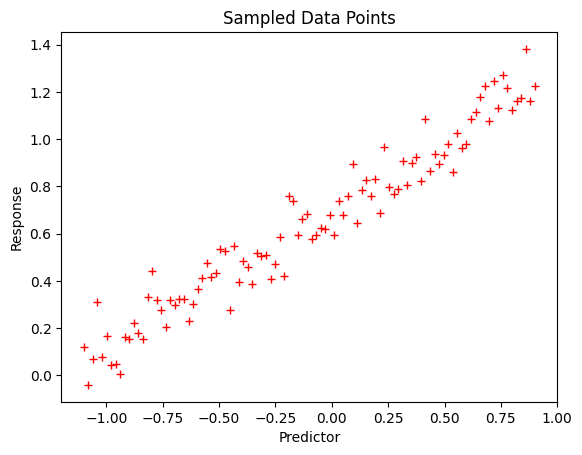

In [ ]:
def gen_data_low():
    coeff = np.random.rand(np.random.choice([3, 5, 7]))
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor_low, response_low = gen_data_low()

plt.plot(predictor_low, response_low, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

x_train_low, x_test_low, y_train_low, y_test_low = train_test_split(predictor_low, response_low, test_size=0.2, random_state=42)

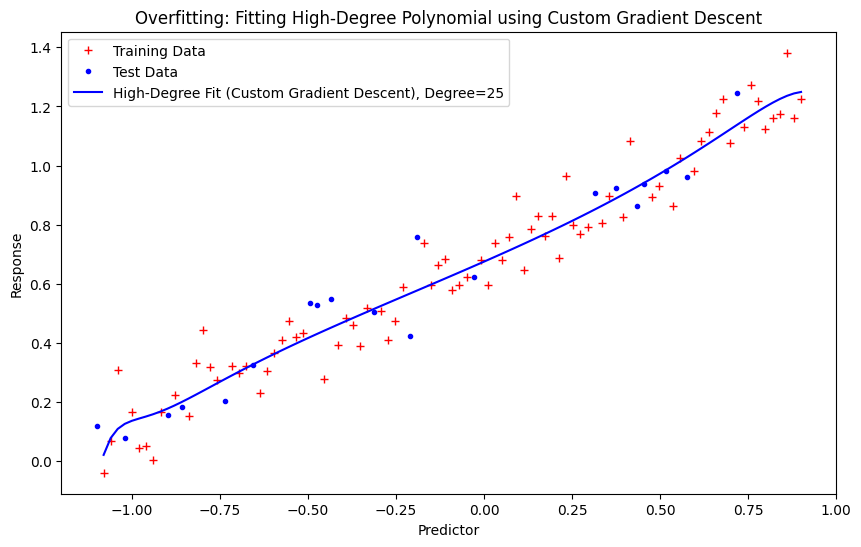

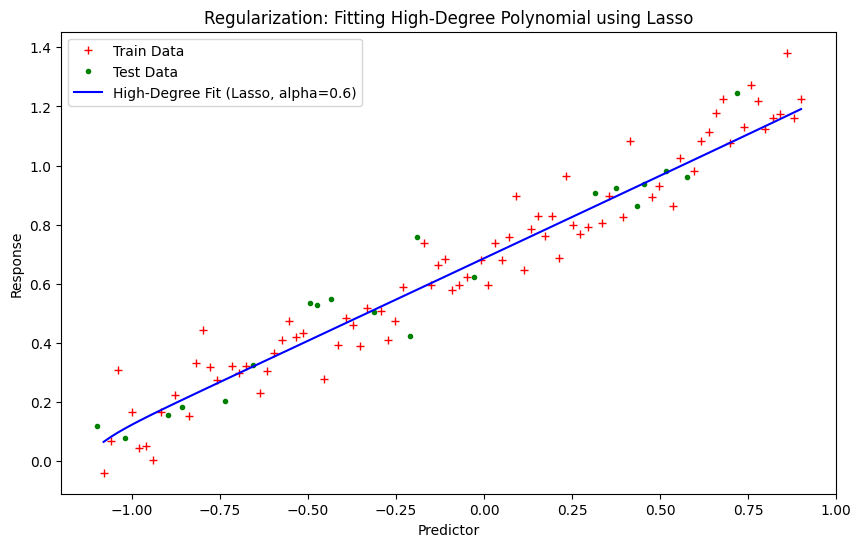

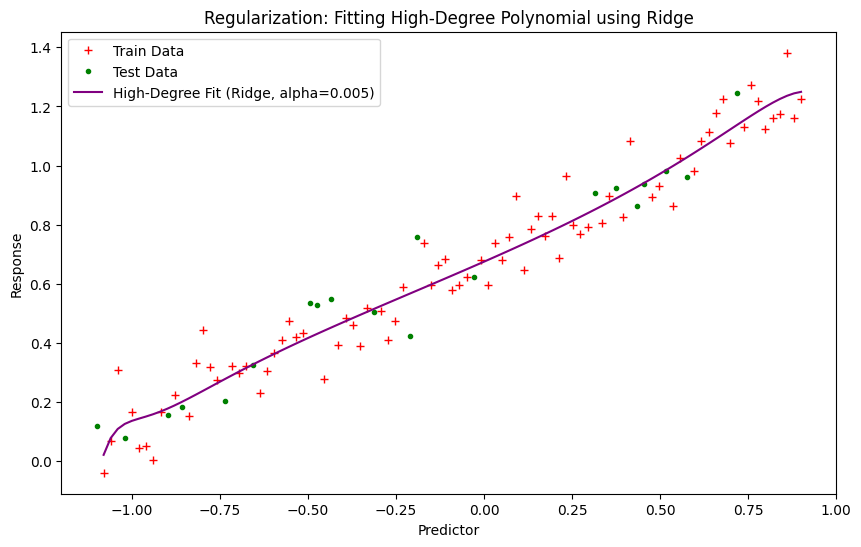

+---------------------------+-----------------------+---------------------+
|          Method           |          MSE          |        RMSE         |
+---------------------------+-----------------------+---------------------+
|     No Regularization     | 0.008027235279359732  | 0.08959483957996539 |
| L1 Regularization (Lasso) | 0.0069658507174245096 | 0.08346167214610854 |
| L2 Regularization (Ridge) |  0.00801173529023598  | 0.08950829732620312 |
+---------------------------+-----------------------+---------------------+


In [ ]:
#######################################CUSTOM-GRAD#######################################################################
class custom_gradient_descent2:
    def __init__(self, degree, learning_rate=0.001, iterations=1000):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.coef = None

    def fit(self, x_train, y_train):
        self.coef = np.zeros(self.degree + 1)

        for iter in range(self.iterations):
            powers_list = []
            for i in range(self.degree + 1):
                power_array = x_train ** (self.degree - i)
                powers_list.append(power_array)
            x_powers = np.column_stack(powers_list)
            y_pred = np.dot(x_powers, self.coef)
            error = (y_pred - y_train)
            gradient = np.dot(x_powers.T, error)
            self.coef -= self.learning_rate * gradient

    def predict(self, x_test):
        x_powers = np.column_stack([x_test ** (self.degree - i) for i in range(self.degree + 1)])
        return np.dot(x_powers, self.coef)



###############################################################################################################################

###################################CUSTOM - LASSO###############################################################################
class CustomLasso:
    def __init__(self, degree, learning_rate=0.001, alpha=0.1, epochs=100):
        self.degree = degree
        self.learning_rate = learning_rate
        self.alpha = alpha
        self.epochs = epochs
        self.coef = None

    def fit(self, x_train, y_train):
        self.coef = np.zeros(self.degree + 1)

        for epoch in range(self.epochs):
            x_powers = np.column_stack([x_train**(self.degree - i) for i in range(self.degree + 1)])
            y_pred = np.dot(x_powers, self.coef)
            error = (y_pred - y_train)
            gradient = np.dot(x_powers.T, error) + self.alpha * np.sign(self.coef)
            self.coef -= self.learning_rate * gradient

    def predict(self, x_test):
        x_powers = np.column_stack([x_test**(self.degree - i) for i in range(self.degree + 1)])
        return np.dot(x_powers, self.coef)

########################################################################################################################

###################################CUSTOM - RIDGE###########################################################################3
class CustomRidge:
    def __init__(self, degree, learning_rate=0.001, alpha=0.01, epochs=100):
        self.degree = degree
        self.learning_rate = learning_rate
        self.alpha = alpha
        self.epochs = epochs
        self.coef = None

    def fit(self, x_train, y_train):
        self.coef = np.zeros(self.degree + 1)

        for epoch in range(self.epochs):
            x_powers = np.column_stack([x_train**(self.degree - i) for i in range(self.degree + 1)])
            y_pred = np.dot(x_powers, self.coef)
            error = (y_pred - y_train)
            gradient = np.dot(x_powers.T, error) + 2* self.alpha * self.coef
            self.coef -= self.learning_rate * gradient

    def predict(self, x_test):
        x_powers = np.column_stack([x_test**(self.degree - i) for i in range(self.degree + 1)])
        return np.dot(x_powers, self.coef)


#############################################################################################################################


####################################DRIVER FOR CUSTOM POLY####################################################################
def fit_polynomial_custom_gradient_descent(degree, x_train, y_train, learning_rate=0.001, iterations=1000):
    model = custom_gradient_descent2(degree=degree, learning_rate=learning_rate, iterations=iterations)
    model.fit(x_train, y_train)
    return model

degree_high = 25
model_high_custom = fit_polynomial_custom_gradient_descent(degree_high, x_train_low, y_train_low)
y_pred_high_custom = model_high_custom.predict(x_test_low)
x_range_low = np.linspace(min(x_train_low), max(x_train_low), 100)
y_pred_high_custom_plot = model_high_custom.predict(x_range_low)

plt.figure(figsize=(10, 6))
plt.plot(x_train_low, y_train_low, 'r+', label='Training Data')
plt.plot(x_test_low, y_test_low, 'b.', label='Test Data')
plt.plot(x_range_low, y_pred_high_custom_plot, 'b-', label=f'High-Degree Fit (Custom Gradient Descent), Degree={degree_high}')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Overfitting: Fitting High-Degree Polynomial using Custom Gradient Descent')
plt.legend()
plt.show()
############################################################################


#########################DRIVER FOR LASSO#################################################################################

def fit_polynomial_lasso_custom(degree, x_train, y_train, alpha=0.1, learning_rate=0.001, epochs=1000):
    model = CustomLasso(degree=degree, alpha=alpha, learning_rate=learning_rate, epochs=epochs)
    model.fit(x_train, y_train)
    return model
alpha_lasso = 0.6
model_high_lasso_custom = fit_polynomial_lasso_custom(degree_high, x_train_low, y_train_low, alpha_lasso)
x_range_high_lasso_custom = np.linspace(min(x_train_low), max(x_train_low), 100)
y_pred_high_lasso_custom = model_high_lasso_custom.predict(x_range_high_lasso_custom)
plt.figure(figsize=(10, 6))
plt.plot(x_train_low, y_train_low, 'r+', label='Train Data')
plt.plot(x_test_low, y_test_low, 'g.', label='Test Data')
plt.plot(x_range_high_lasso_custom, y_pred_high_lasso_custom, 'b-', label=f'High-Degree Fit (Lasso, alpha={alpha_lasso})')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Regularization: Fitting High-Degree Polynomial using Lasso')
plt.legend()
plt.show()

######################################################################################################3


###################################DRIVER FOR CUSTOM RIDGE#########################################################################

def fit_polynomial_ridge_custom(degree, x_train, y_train, alpha=.1, learning_rate=0.001, epochs=1000):
    model = CustomRidge(degree=degree, alpha=alpha, learning_rate=learning_rate, epochs=epochs)
    model.fit(x_train, y_train)
    return model
alpha_ridge = 0.0050
model_high_ridge_custom = fit_polynomial_ridge_custom(degree_high, x_train_low, y_train_low, alpha_ridge)
model_high_ridge_custom = fit_polynomial_ridge_custom(degree_high, x_train_low, y_train_low, alpha_ridge)
x_range_high_ridge_custom = np.linspace(min(x_train_low), max(x_train_low), 100)
y_pred_high_ridge_custom = model_high_ridge_custom.predict(x_range_high_ridge_custom)
plt.figure(figsize=(10, 6))
plt.plot(x_train_low, y_train_low, 'r+', label='Train Data')
plt.plot(x_test_low, y_test_low, 'g.', label='Test Data')
plt.plot(x_range_high_ridge_custom, y_pred_high_ridge_custom, 'purple', label=f'High-Degree Fit (Ridge, alpha={alpha_ridge})')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Regularization: Fitting High-Degree Polynomial using Ridge')
plt.legend()
plt.show()

##########################################################################
from sklearn.metrics import mean_squared_error
from tabulate import tabulate


y_pred_no_reg_test = model_high_custom.predict(x_test_low)
mse_no_reg_test = mean_squared_error(y_test_low, y_pred_no_reg_test)
rmse_no_reg_test = np.sqrt(mse_no_reg_test)

y_pred_lasso_test = model_high_lasso_custom.predict(x_test_low)
mse_lasso_test = mean_squared_error(y_test_low, y_pred_lasso_test)
rmse_lasso_test = np.sqrt(mse_lasso_test)

y_pred_ridge_test = model_high_ridge_custom.predict(x_test_low)
mse_ridge_test = mean_squared_error(y_test_low, y_pred_ridge_test)
rmse_ridge_test = np.sqrt(mse_ridge_test)

data = {
    "Method": ["No Regularization", "L1 Regularization (Lasso)", "L2 Regularization (Ridge)"],
    "MSE": [mse_no_reg_test, mse_lasso_test, mse_ridge_test],
    "RMSE": [rmse_no_reg_test, rmse_lasso_test, rmse_ridge_test]
}
results_table_test = pd.DataFrame(data)
table_str = tabulate(results_table_test, headers='keys', tablefmt='pretty', showindex=False)
print(table_str)

###################################3

### Part 2: Credit Data

In this part, we work with the credit.csv file that predicts `Balance` after looking at predictors like `Income`, `Age`, `Limit`, etc. Your task is to understand the relationship between the predictors and response using linear regression techniques. Specifically:

1. Perform multiple linear regression on the dataset. $(Y=\sum\beta_iX_i+\epsilon)$
2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.
3. Test for [interaction effects](https://en.wikipedia.org/wiki/Interaction_(statistics)#In_regression) between `Rating` and `Age`.

As before, perform the above experiments by obtaining and reporting error metrics for all experiments.

In [ ]:
credit = pd.read_csv('credit.csv')
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


##########################################
Mean Squared Error (Testing): 29548.4443727729
#############################################


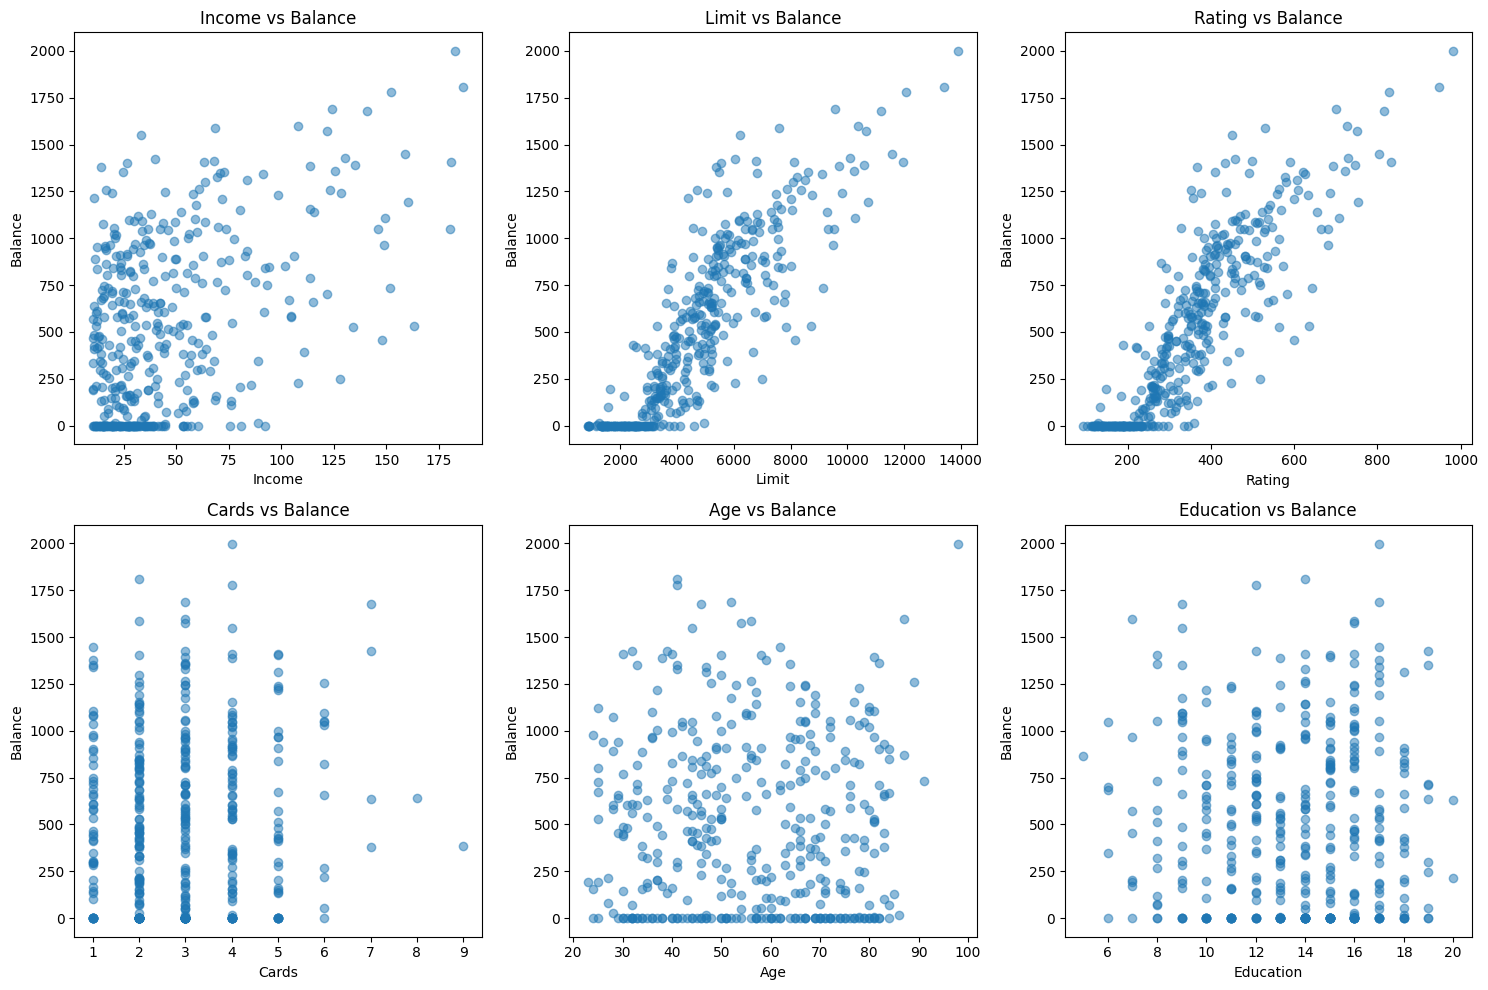

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
       # self.alpha = alpha
        self.coefficient = None
        self.mean = None
        self.std = None

    def normalize(self, X):
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        if np.any(std < 1e-8):
            std += 1e-8
        X_normalized = (X - mean) / std
        self.mean = mean
        self.std = std
        return X_normalized

    def add_intercept(self, X):
      intercept_column = np.ones((X.shape[0], 1))
      return np.concatenate([intercept_column, X], axis=1)

    def fit(self, X, y):
        X_normalized = self.normalize(X)
        #X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        X_normalized_with_intercept = self.add_intercept(X_normalized)
        num_samples, num_features = X_normalized_with_intercept.shape
        self.coefficient = np.zeros(num_features)


        for _ in range(self.num_iterations):
            error = np.dot(X_normalized_with_intercept, self.coefficient) - y
            gradient = (np.dot(X_normalized_with_intercept.T, error))/ num_samples
            self.coefficient -= self.learning_rate * gradient
            #print(self.coefficient)

    def predict(self, X):
        X_normalized = (X - self.mean) / self.std
        X_with_intercept = self.add_intercept(X_normalized)
        return np.dot(X_with_intercept, self.coefficient)

df = pd.read_csv('credit.csv')
X = df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']].values
Y = df['Balance'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression(learning_rate=.01, num_iterations=10000)
model.fit(X_train, Y_train)
Y_test_pred = model.predict(X_test)
mse_test = np.mean((Y_test - Y_test_pred)**2)
print("##########################################")
print(f'Mean Squared Error (Testing): {mse_test}')
print("#############################################")
features = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df[feature], df['Balance'], alpha=0.5)
    plt.title(f'{feature} vs Balance')
    plt.xlabel(feature)
    plt.ylabel('Balance')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

df1 = pd.read_csv('credit.csv')
X1 = df1[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
Y1 = df1['Balance']
X1 = X1 -X1.mean()/X1.std()
X1 = sm.add_constant(X1)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=42)
model1 = sm.OLS(Y_train1, X_train1).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     415.5
Date:                Thu, 01 Feb 2024   Prob (F-statistic):          8.41e-146
Time:                        12:20:25   Log-Likelihood:                -2072.7
No. Observations:                 320   AIC:                             4159.
Df Residuals:                     313   BIC:                             4186.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -422.2190     53.639     -7.871      0.0

In [ ]:

selected_features = ['Income','Limit','Rating', 'Cards','Age']
X_selected = df[selected_features].values
Y_selected = df['Balance'].values
X_train_selected, X_test_selected, Y_train_selected, Y_test_selected = train_test_split(
    X_selected, Y_selected, test_size=0.2, random_state=42
)
model_selected = LinearRegression(learning_rate=0.01, num_iterations=10000)
model_selected.fit(X_train_selected, Y_train_selected)
Y_test_pred_selected = model_selected.predict(X_test_selected)
mse_test_selected = np.mean((Y_test_selected - Y_test_pred_selected) ** 2)
print("##########################################")
print(f'Mean Squared Error (Testing) with selected features(excluding education): {mse_test_selected}')
print("#############################################")

##########################################
Mean Squared Error (Testing) with selected features(excluding education): 29537.174387620056
#############################################


In [ ]:

selected_features = ['Income','Limit','Rating']
X_selected = df[selected_features].values
Y_selected = df['Balance'].values
X_train_selected, X_test_selected, Y_train_selected, Y_test_selected = train_test_split(
    X_selected, Y_selected, test_size=0.2, random_state=42
)
model_selected = LinearRegression(learning_rate=0.01, num_iterations=10000)
model_selected.fit(X_train_selected, Y_train_selected)
Y_test_pred_selected = model_selected.predict(X_test_selected)
mse_test_selected = np.mean((Y_test_selected - Y_test_pred_selected) ** 2)
print("##########################################")
print(f'Mean Squared Error (Testing) with selected features(excluding Cards,Age and Education): {mse_test_selected}')
print("#############################################")

##########################################
Mean Squared Error (Testing) with selected features(excluding Cards,Age and Education): 29441.131410533922
#############################################


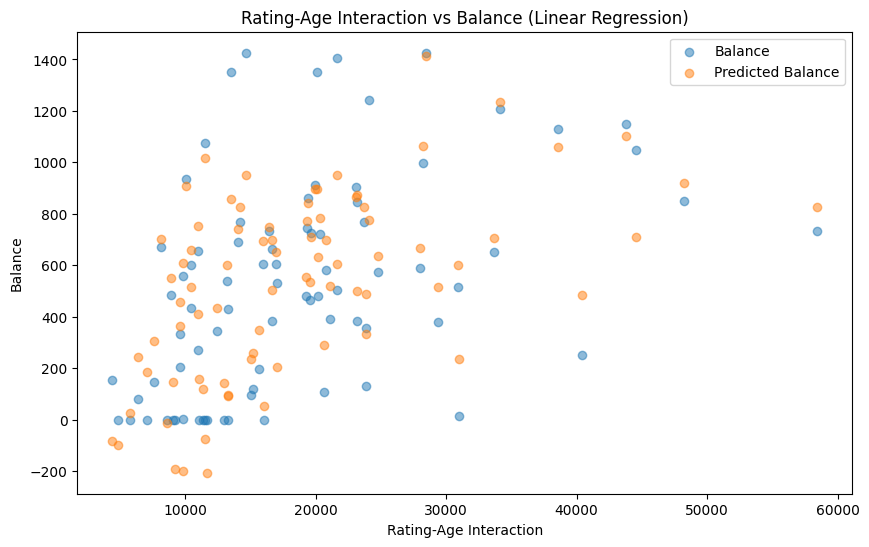

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     355.0
Date:                Thu, 01 Feb 2024   Prob (F-statistic):          1.79e-144
Time:                        12:37:32   Log-Likelihood:                -2072.7
No. Observations:                 320   AIC:                             4161.
Df Residuals:                     312   BIC:                             4191.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -460

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv('credit.csv')
X = df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
Y = df['Balance']
X['Rating_Age_interaction'] = X['Rating'] * X['Age']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression(learning_rate=.01, num_iterations=10000)
model.fit(X_train, Y_train)
Y_test_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Rating_Age_interaction'], Y_test, alpha=0.5, label='Balance')
plt.scatter(X_test['Rating_Age_interaction'], Y_test_pred, alpha=0.5, label='Predicted Balance')
plt.title('Rating-Age Interaction vs Balance (Linear Regression)')
plt.xlabel('Rating-Age Interaction')
plt.ylabel('Balance')
plt.legend()
plt.show()
X_train_with_intercept = sm.add_constant(X_train)
model_ols = sm.OLS(Y_train, X_train_with_intercept).fit()
print(model_ols.summary())

### Part 3: Shark Attacks

This is a fun dataset that aims to predict the number of shark attacks (`SharkAttacks`) using variables like `Year`, `Month`, `Temperature`, and `IceCreamSales`. This dataset has been used in popular media to show how correlation does not imply causation. Test whether predictions made with ice cream sales data are any better/worse than predictions made by neglecting ice cream sales data.

This sort of analysis reminds us that it is important to look at the data before using it for learning representations.

In [ ]:
sharks = pd.read_csv('shark_attacks.csv')
sharks.head()

,Year,Month,SharkAttacks,Temperature,IceCreamSales
0,2008,1,25,11.9,76
1,2008,2,28,15.2,79
2,2008,3,32,17.2,91
3,2008,4,35,18.5,95
4,2008,5,38,19.4,103


from matplotlib import pyplot as plt
_df_0['Month'].plot(kind='hist', bins=20, title='Month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['SharkAttacks'].plot(kind='hist', bins=20, title='SharkAttacks')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Temperature'].plot(kind='hist', bins=20, title='Temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['IceCreamSales'].plot(kind='hist', bins=20, title='IceCreamSales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Month', y='SharkAttacks', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='SharkAttacks', y='Temperature', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Temperature', y='IceCreamSales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Month']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Month'}, axis=1)
              .sort_values('Month', ascending=True))
  xs = counted['Month']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Month')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['SharkAttacks']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'SharkAttacks'}, axis=1)
              .sort_values('SharkAttacks', ascending=True))
  xs = counted['SharkAttacks']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('SharkAttacks', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SharkAttacks')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Temperature']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Temperature'}, axis=1)
              .sort_values('Temperature', ascending=True))
  xs = counted['Temperature']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Temperature', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Temperature')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['Month'].plot(kind='line', figsize=(8, 4), title='Month')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['SharkAttacks'].plot(kind='line', figsize=(8, 4), title='SharkAttacks')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Temperature'].plot(kind='line', figsize=(8, 4), title='Temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['IceCreamSales'].plot(kind='line', figsize=(8, 4), title='IceCreamSales')
plt.gca().spines[['top', 'right']].set_visible(False)

###########################################################
Overall Mean Squared Error (Testing): 37.67537629666924
##########################################################


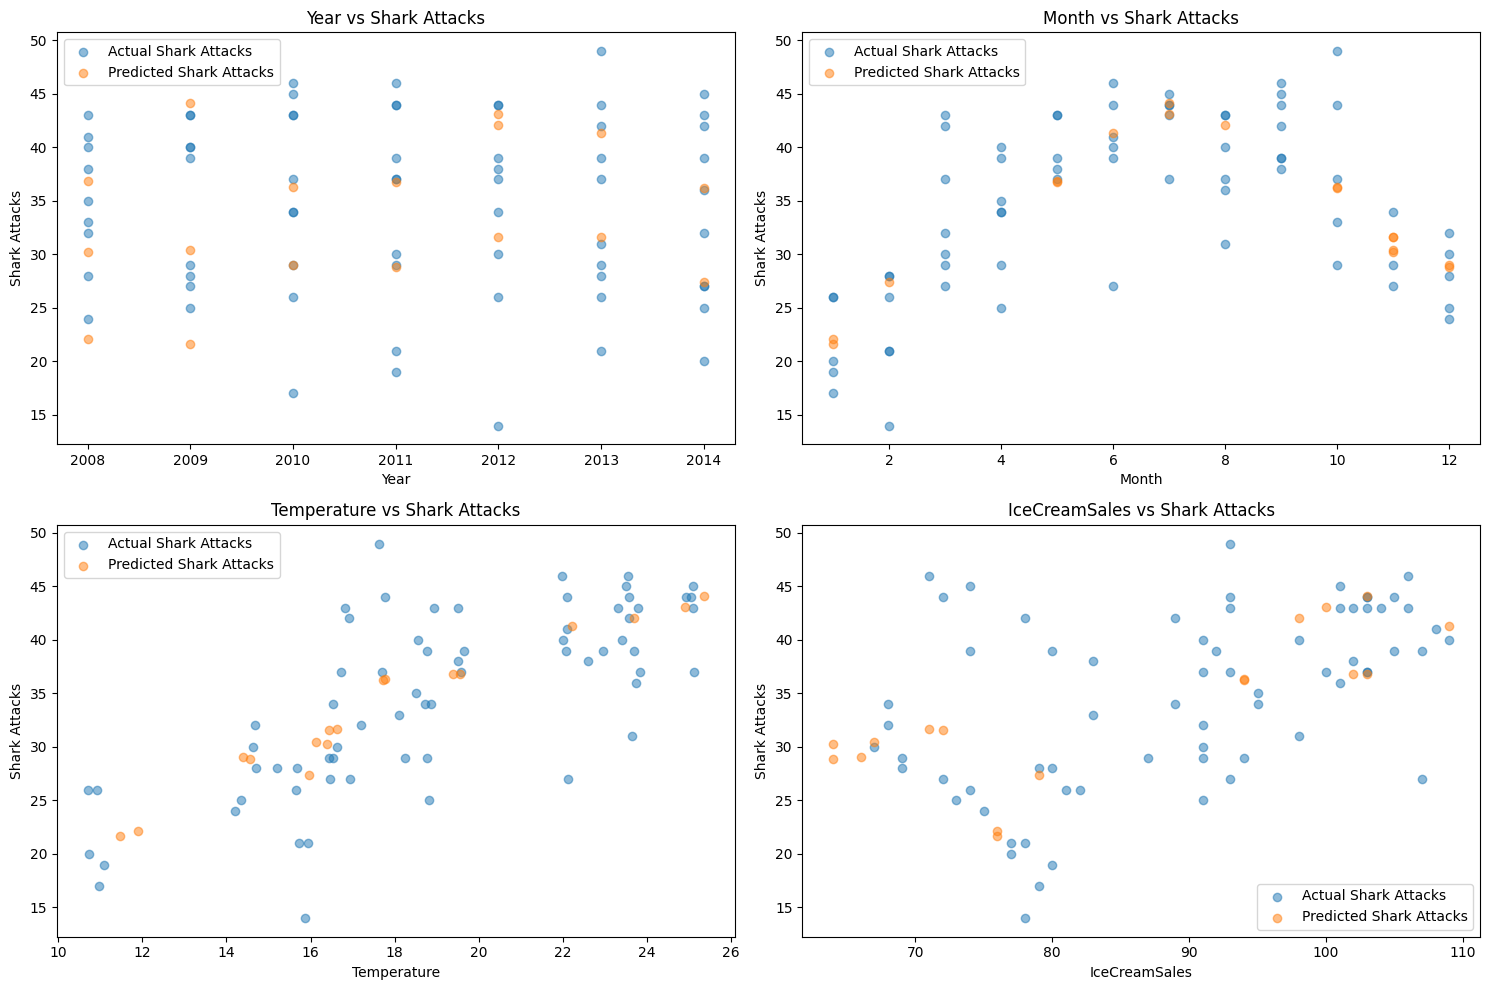

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     20.79
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           6.62e-11
Time:                        12:40:12   Log-Likelihood:                -207.65
No. Observations:                  67   AIC:                             425.3
Df Residuals:                      62   BIC:                             436.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.6716    690.284      0.018

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('shark_attacks.csv')
X = df[['Year', 'Month', 'Temperature', 'IceCreamSales']].values
Y = df['SharkAttacks'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression(learning_rate=.01, num_iterations=10000)
model.fit(X_train, Y_train)
Y_test_pred = model.predict(X_test)
overall_mse_test = np.mean((Y_test - Y_test_pred)**2)
print('###########################################################')
print(f'Overall Mean Squared Error (Testing): {overall_mse_test}')
print('##########################################################')
features = ['Year', 'Month', 'Temperature', 'IceCreamSales']
plt.figure(figsize=(15, 10))


for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_train[:, i-1], Y_train, alpha=0.5, label='Actual Shark Attacks')
    plt.scatter(X_test[:, i-1], Y_test_pred, alpha=0.5,label='Predicted Shark Attacks')
    plt.title(f'{feature} vs Shark Attacks')
    plt.xlabel(feature)
    plt.ylabel('Shark Attacks')
    plt.legend()

plt.tight_layout()
plt.show()


X_train_ols = pd.DataFrame(X_train, columns=features)
X_train_ols = sm.add_constant(X_train_ols)
model_ols = sm.OLS(Y_train, X_train_ols).fit()
print(model_ols.summary())


###########################################################
Overall Mean Squared Error (Testing): 43.3813807767894
##########################################################


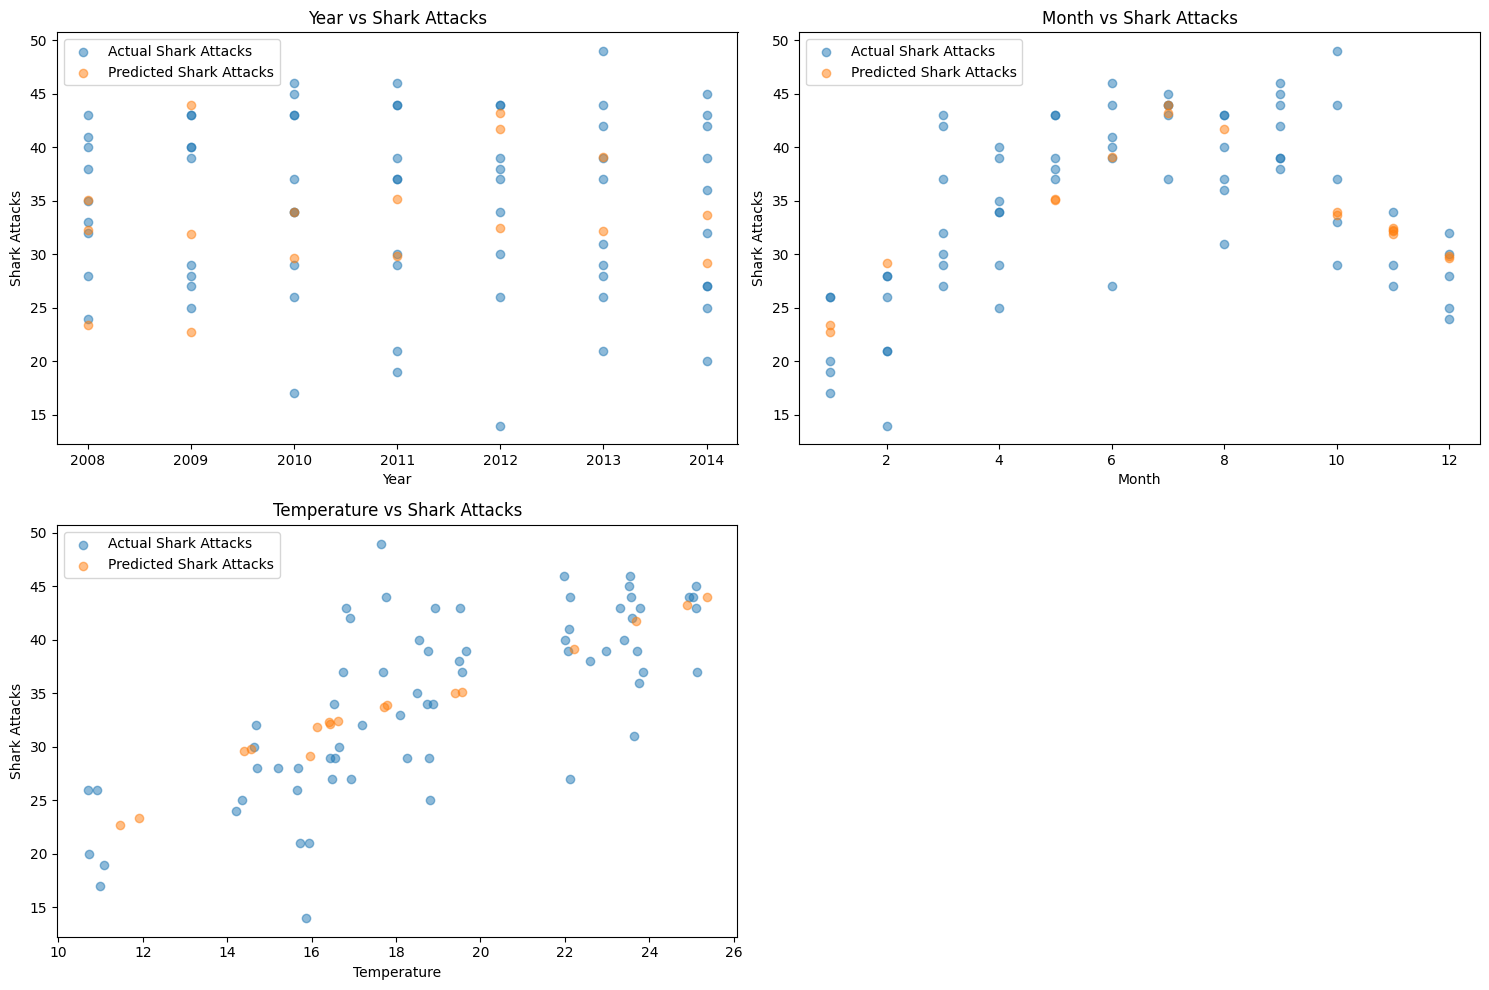

In [ ]:

df = pd.read_csv('shark_attacks.csv')
X = df[['Year', 'Month', 'Temperature']].values
Y = df['SharkAttacks'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression(learning_rate=.01, num_iterations=10000)
model.fit(X_train, Y_train)
Y_test_pred = model.predict(X_test)
overall_mse_test = np.mean((Y_test - Y_test_pred)**2)
print('###########################################################')
print(f'Overall Mean Squared Error (Testing): {overall_mse_test}')
print('##########################################################')
features = ['Year', 'Month', 'Temperature']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_train[:, i-1], Y_train, alpha=0.5, label='Actual Shark Attacks')
    plt.scatter(X_test[:, i-1], Y_test_pred, alpha=0.5,label='Predicted Shark Attacks')
    plt.title(f'{feature} vs Shark Attacks')
    plt.xlabel(feature)
    plt.ylabel('Shark Attacks')
    plt.legend()
plt.tight_layout()
plt.show()

As mentioned in the question, Correlation does not imply causation . The data proves so. Ice cream nowhere is related to the data, but some how the data is growing linear according to the output. If we dont have enough domain knowledge we might end up including icecream sales in our output as MSE is increasing when you remove it and P-value is low, making it significant feature. But, then we should not include it
